DL - Assignment : Generated a sequnce of numbers which when divided by 3 give a remainder of 1 or 2. The list was reversed and combined with former to form a single dataset matrix. The target matrix predicts the product of elements of a particular row of the dataset matrix. **Submited By**: [15MI427]

In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
N=[]
for num in range(1,150):
    if num % 3 == 1 or num % 3 ==2:
        N.append(num/200)
        continue
    pass

In [0]:
M=N[::-1]

In [0]:
N

In [0]:
M

In [0]:
Dataset = np.column_stack((N, M))

In [0]:
Dataset


In [0]:
Target = [n*m for n,m in zip(N,M)]

In [0]:
target

In [0]:
dataset = np.array(Dataset,dtype=float)
target = np.array(Target,dtype=float)

In [0]:
dataset = np.array(dataset).reshape(100, 2,1)

In [93]:
dataset.shape

(100, 2, 1)

In [94]:
target.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(dataset,target,test_size=0.2,random_state=4)

In [102]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu',))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 2, 100)            40800     
_________________________________________________________________
lstm_11 (LSTM)               (None, 2, 50)             30200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 78,871
Trainable params: 78,871
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
hist = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

In [0]:
result = model.predict(x_test)

In [106]:
result.shape

(20, 1)

In [107]:
y_test.shape

(20,)

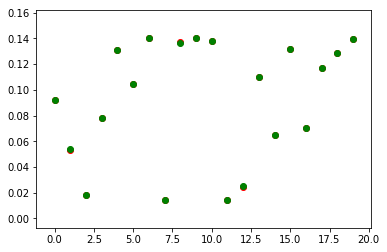

In [108]:
plt.scatter(range(20),result,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

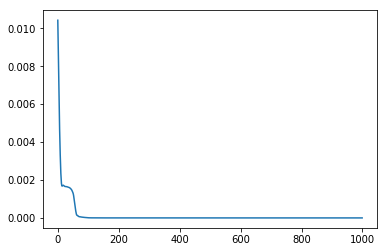

In [112]:
plt.plot(hist.history['loss'])
plt.show()